In [0]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt

In [0]:
data_source_url = "https://raw.githubusercontent.com/dilaaslan3/Imdb-Dataset/master/IMDB%20Dataset.csv"
movie_reviews = pd.read_csv(data_source_url)

movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


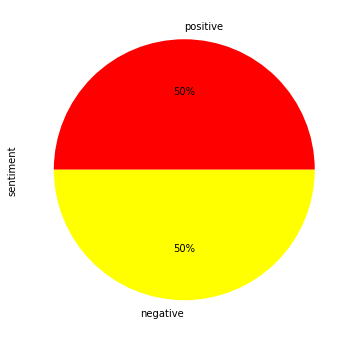

In [0]:
movie_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [0]:
features = movie_reviews['review']
labels = movie_reviews['sentiment']

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
processed_features = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    processed_features.append(preprocess_text(sen))

# Representing Text in Numeric Form

In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer compute the word counts, idf and tf-idf values at once

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(processed_features).toarray()

print(processed_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Dividing Data into Training and Test Sets

In [0]:
from sklearn.model_selection import train_test_split
#The method train_test_split() takes the feature set as the first parameter, the label set as the second parameter, and a value for the test_size parameter.
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Training the Model

In [0]:
#Multilayer Perceptron classifier
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver = 'lbfgs', alpha = 0.00095, learning_rate = 'adaptive', learning_rate_init = 0.005, max_iter = 3000, random_state = 0)
Perceptron = NN.fit(X_train, y_train)

# Making Predictions and Evaluating the Model

In [0]:
predictions = Perceptron.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

print("\nprecision_score is:")
print(precision_score(y_test, predictions, average = 'weighted'))

print("\nrecall_score is:")
print(recall_score(y_test, predictions, average = 'weighted'))

# print("\n",confusion_matrix(y_test,predictions))
print("\n",classification_report(y_test,predictions))
print("\n",accuracy_score(y_test, predictions))

['positive' 'negative' 'positive' ... 'positive' 'negative' 'negative']

precision_score is:
0.8245042733784587

recall_score is:
0.8245

               precision    recall  f1-score   support

    negative       0.83      0.82      0.83      5035
    positive       0.82      0.82      0.82      4965

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


 0.8245
